In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import tkinter as tk
import math
import sys
import pandas as pd
sys.setrecursionlimit(15000)


In [4]:

#Constant values
gravity = 9.82#m/s^2
ballMass = 0.058 #.058kg
airDensity = (1.21) #kg/m^3
radius = (0.033)#m
pi = (3.14)
crossSection =(pi * (radius**2))

In [8]:
#User input from textboxes needed. Calculating spin(rpm/60 * 2pi = (rads))
velocity_km=float(input())
velocity = velocity_km/3.6 
rpm = int(input())
rps = rpm/60
spin_rads = rps * (2*3.14)
v_spin=(spin_rads * radius)
k = velocity/v_spin
apv = crossSection * airDensity * velocity
theta_deg=float(input())
theta =theta_deg*pi/180
deltaT = 0.05


100
3000
15


In [7]:
#sine and cosine functions

In [9]:
#Lift Coefficient0.2150321215
Cl = (1/(2.022 + (0.981*(velocity/v_spin))))

In [10]:
# #Drag Coefficient0.5376334382
Cd = (0.508+1/(22.503+4.196*((velocity/v_spin)**2.5))**0.4)


In [11]:
#Fd and FL
Fd = 1/2*(Cd * crossSection * airDensity *(velocity**2))
Fl = 1/2*(Cl * crossSection * airDensity *(velocity**2))

In [12]:
print ("Drag Coefficient",Cd)
print ("Lift coefficient", Cl)
print ("Fd", Fd)
print ("Fl", Fl)
print ("cross section" , crossSection)
print ("air density", airDensity)
print ("velocity", velocity)

Drag Coefficient 0.6888721627714209
Lift coefficient 0.2149704937334089
Fd 1.0996298900113965
Fl 0.34315217416936244
cross section 0.0034194600000000005
air density 1.21
velocity 27.77777777777778


In [13]:
#Magnus force
magnus_force = 1/2*((Cl*crossSection*airDensity)*(velocity**2))

In [14]:
print(magnus_force)

0.34315217416936244


In [21]:

def func_topspin_vx(updated_velocity,new_theta,new_cd,new_cl,new_vx,new_vy):
    
    dv_dt= (0.03568659676*updated_velocity)*((-new_cd*new_vx)+(new_cl*(updated_velocity*math.sin(new_theta))))
    return dv_dt
def func_topspin_vy(updated_velocity,new_theta,new_cd,new_cl,new_vx,new_vy):
    
     dv_dt=((0.03568659676*updated_velocity)*((-new_cd*(updated_velocity*math.cos(new_theta))-(new_cl*new_vy)))- gravity)
     return dv_dt




In [22]:
def plot(userx,usery,theta,Cd,Cl,v_spin,rpm):
  x,y=userx,usery
  updated_velocity=velocity
  new_theta=theta
  new_cd=Cd
  new_cl=Cl
  t=0
  vx=velocity*math.cos(theta)
  vy=velocity*math.sin(theta)
  e =float(input()) #needs to be user input as well .75
  new_vx=vx
  new_vy=vy
  data=pd.DataFrame(columns=['x','y','t','Cd','Cl','V','Theta','vx','vy','dvx/dt','dvy/dt'])
  
  while y>0:
      
      dvx_dt=func_topspin_vx(updated_velocity,new_theta,new_cd,new_cl,new_vx,new_vy)
      dvy_dt=func_topspin_vy(updated_velocity,new_theta,new_cd,new_cl,new_vx,new_vy)
      
      
     
      # vx and vy values
      new_vx=vx+dvx_dt*t
      new_vy=vy+dvy_dt*t
      # updated theta
      new_theta=math.atan(new_vy/new_vx)
      # updated velocity
      updated_velocity= new_vx/math.cos(new_theta)
      # updated cd and cl
      new_cd=(0.508+1/(22.503+4.196*((updated_velocity/v_spin)**2.5))**0.4)
      new_cl=(1/(2.022 + (0.981*(updated_velocity/v_spin))))
     
      # co-ordinates
      x=x+new_vx*t
      y=y+new_vy*t
      
      if(y>0):
        data=data.append({'x':x,'y':y,'t':t,'Cd':new_cd,'Cl':new_cl,'V':updated_velocity,'Theta':new_theta,'vx':new_vx,'vy':new_vy,'dvx/dt':dvx_dt,'dvy/dt':dvy_dt},ignore_index=True)
      else:
        break
      if data.shape[0]==1:
        t=deltaT
      else:
        t=t+deltaT
  
  while y>-10:
        #bounce
        rps = rpm/60
        spin_rads = rps * (2*3.14)
        vy = -e * new_vy
        vx = new_vx - ((new_vx- .33*spin_rads)/(1+1/.55)) 
        spin_rads_bounce= spin_rads + ((new_vx - .33 *spin_rads)/(.33*(1+.55)))
        v_spin=(spin_rads_bounce * radius)
        
      
        dvx_dt=func_topspin_vx(updated_velocity,new_theta,new_cd,new_cl,new_vx,new_vy)
        dvy_dt=func_topspin_vy(updated_velocity,new_theta,new_cd,new_cl,new_vx,new_vy)
               
        
        # vx and vy values
        new_vx=vx+dvx_dt*t
        new_vy=vy+dvy_dt*t
        
        # updated theta
        new_theta=math.atan(new_vy/new_vx)
        
        # updated velocity
        updated_velocity= new_vx/math.cos(new_theta)
        
        # updated cd and cl
        new_cd=(0.508+1/(22.503+4.196*((updated_velocity/v_spin)**2.5))**0.4)
        new_cl=(1/(2.022 + (0.981*(updated_velocity/v_spin))))
        
        # co-ordinates
        x=x+new_vx*t
        y=y+new_vy*t
        y1=abs(y)
        if(y1>0 and y1<10):
          data=data.append({'x':x,'y':y1,'t':t,'Cd':new_cd,'Cl':new_cl,'V':updated_velocity,'Theta':new_theta,'vx':new_vx,'vy':new_vy,'dvx/dt':dvx_dt,'dvy/dt':dvy_dt},ignore_index=True)
        else:
          break
        t=t+deltaT

  return data
 


In [23]:
userx = float(input())#26.83127295
usery = float(input())#7.18941792
df=plot(userx,usery,theta,Cd,Cl,v_spin,rpm)



0
1
0.75


In [24]:
df



,x,y,t,Cd,Cl,V,Theta,vx,vy,dvx/dt,dvy/dt
0,0.000000,1.000000,0.00,0.688872,0.214970,27.777778,0.261667,26.832227,7.185857,-16.791760,-29.674358
1,1.299632,1.285107,0.05,0.694191,0.220201,26.610743,0.215954,25.992639,5.702139,-16.791760,-29.674358
2,3.823426,1.722216,0.10,0.698889,0.224875,25.613666,0.171494,25.237937,4.371089,-15.942896,-28.147676
3,7.505713,2.196167,0.15,0.703066,0.229082,24.751092,0.128007,24.548585,3.159672,-15.224276,-26.841232
4,12.287940,2.605172,0.20,0.706792,0.232883,23.998424,0.085318,23.911132,2.045026,-14.605474,-25.704154
5,18.116882,2.857788,0.25,0.710123,0.236326,23.337655,0.043311,23.315769,1.010463,-14.065830,-24.701575
6,24.943403,2.870799,0.30,0.713103,0.239447,22.755112,0.001906,22.755070,0.043371,-13.590522,-23.808285
7,32.721541,2.567691,0.35,0.715769,0.242275,22.240119,-0.038949,22.223251,-0.866022,-13.168501,-23.005368
8,41.407828,1.877518,0.40,0.718153,0.244836,21.784156,-0.079289,21.715716,-1.725434,-12.791278,-22.278227
9,50.960765,0.734046,0.45,0.720282,0.247150,21.380289,-0.119132,21.228750,-2.541049,-12.452171,-21.615346


# New Section

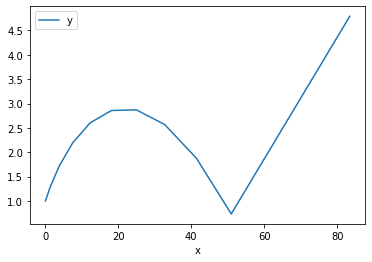

In [25]:
df.plot('x','y')


In [68]:
df.to_csv('Topspindata.csv',encoding = 'utf-8-sig')